In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv")

In [3]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [4]:
pd.to_datetime(df["date"])

0      2016-05-09
1      2016-05-10
2      2016-05-11
3      2016-05-12
4      2016-05-13
          ...    
1299   2019-11-29
1300   2019-11-30
1301   2019-12-01
1302   2019-12-02
1303   2019-12-03
Name: date, Length: 1304, dtype: datetime64[ns]

In [5]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
df = df.set_index("date")

In [7]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [8]:
dfclean = df.drop(df[df["value"] > df["value"].quantile(0.975)].index)

In [9]:
dfclean = df.drop(df[df["value"] < df["value"].quantile(0.025)].index)

In [10]:
dfclean

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


<Axes: xlabel='date', ylabel='value'>

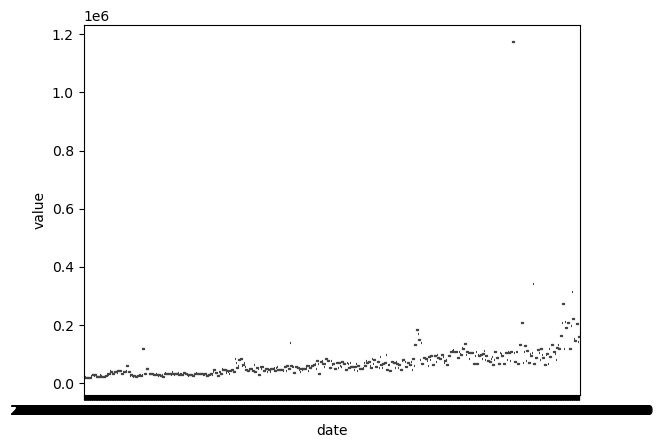

In [13]:
sns.boxplot(data=dfclean, x=dfclean.index,y="value")

In [27]:
dfh=pd.read_csv("fcc-forum-pageviews.csv",parse_dates=["date"],index_col="date")

In [35]:
dfh.index = dfh.index.strftime("%Y")

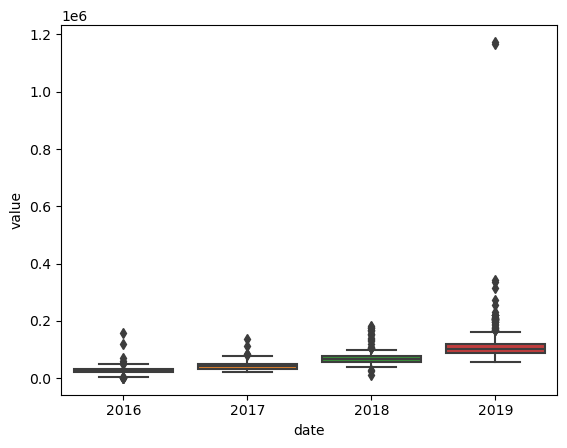

In [43]:
fig, ax = plt.subplots()

sns.boxplot(data=dfh, x=dfh.index, y=dfh["value"], ax=ax)
plt.show()